In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

### Population Creation

In [62]:
# This is the number of different observations we will have in the entire population sample
population_size = 1000000

# This creates the dataframe where we will store all the necessary data
df_population = pd.DataFrame(columns=['value'])

# This creates a list of a numbers between 0 and 10 and applies it to the value column 
df_population['value'] = np.random.uniform(0,10, size = population_size)

display(df_population)

,value
0,3.897946
1,0.009589
2,7.062408
3,9.890955
4,9.481867
...,...
999995,9.481735
999996,3.754138
999997,3.333913
999998,3.881408


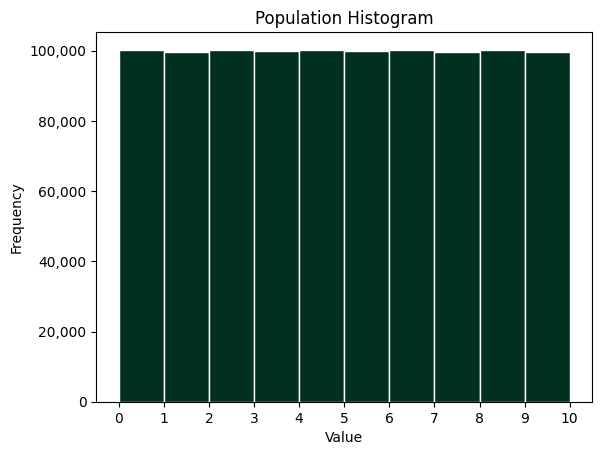

In [63]:
# This plots the distribution of the population

plt.hist(df_population['value'], bins = 10, edgecolor = 'white', color = '#023020', alpha = 1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Population Histogram')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=11))


plt.show()

In [64]:
# Let's find the population mean and standard deviation

population_mean               = df_population['value'].mean().round(3)
population_standard_deviation = df_population['value'].std().round(3)

print(f"The population mean is {population_mean}.")
print(f"The population standard deviation is {population_standard_deviation}")

The population mean is 4.999.
The population standard deviation is 2.886


### Sampling Distribution

In [65]:
n_simulations   = 1000
max_sample_size = 100
min_sample_size = 3

# Prepare an array to store the results
sample_sizes = np.arange(min_sample_size,max_sample_size+1)
mean_values  = []

for sample_size in sample_sizes:

    # This creates a matrix
    # Each row is all the values of 1 sample
    samples = np.random.choice(df_population['value'], (n_simulations, sample_size))

    # This takes the mean of the ROW (that's why it says axis=1)
    means = np.mean(samples, axis=1)

    mean_values.append(means)


# Flatten the list of means and create a DataFrame
mean_values = np.concatenate(mean_values)
sample_sizes_repeated = np.repeat(sample_sizes, n_simulations)

df_sample = pd.DataFrame({'n':sample_sizes_repeated, 'sample_mean':mean_values})
display(df_sample)

,n,sample_mean
0,3,5.443506
1,3,9.061393
2,3,5.071803
3,3,6.302305
4,3,6.910873
...,...,...
97995,100,4.934239
97996,100,5.005891
97997,100,4.346366
97998,100,5.344992


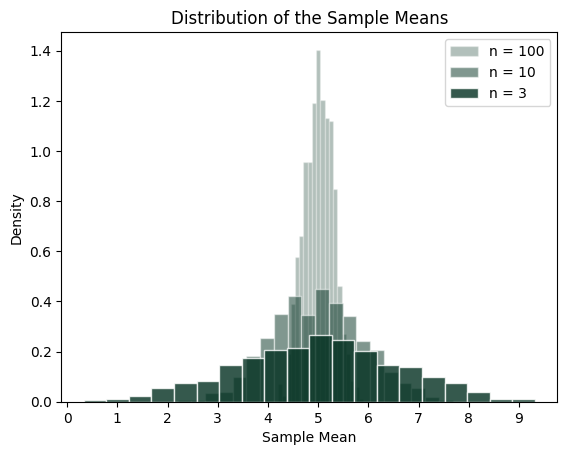

In [69]:
data_n3   = df_sample[df_sample['n'] == 3]['sample_mean']
data_n10  = df_sample[df_sample['n'] == 10]['sample_mean']
data_n30  = df_sample[df_sample['n'] == 30]['sample_mean']
data_n100 = df_sample[df_sample['n'] == 100]['sample_mean']


plt.hist(data_n100, bins = 20, edgecolor = 'white', alpha = 0.3, density=True, color = '#023020', label = 'n = 100')
plt.hist(data_n10 , bins = 20, edgecolor = 'white', alpha = 0.5, density=True, color = '#023020', label = 'n = 10')
plt.hist(data_n3  , bins = 20, edgecolor = 'white', alpha = 0.8, density=True, color = '#023020', label = 'n = 3')

plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Distribution of the Sample Means')
# plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=11))
plt.legend()


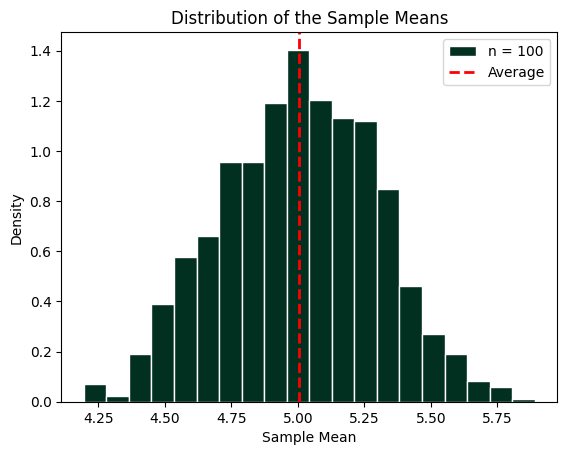

In [70]:
plt.hist(data_n100, bins = 20, edgecolor = 'white', alpha = 1, density = True, color = '#023020', label = 'n = 100')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Distribution of the Sample Means')
plt.axvline(data_n100.mean(), color="red", linestyle="--", linewidth=2, label="Average")
plt.legend()

/var/folders/k5/pzz3ljxd7ylc3t039342bddm0000gn/T/ipykernel_4359/815010728.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(df_sample_stats['n'], df_sample_stats['mean'], 'b-', color = '#023020', label='Mean')
/var/folders/k5/pzz3ljxd7ylc3t039342bddm0000gn/T/ipykernel_4359/815010728.py:27: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(df_sample_stats['n'], df_sample_stats['std'], 'r-', color = '#023020', linestyle = 'dashed', label='Sample Standard Deviation')
/var/folders/k5/pzz3ljxd7ylc3t039342bddm0000gn/T/ipykernel_4359/815010728.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(df_sample_stats['n'], df_sa

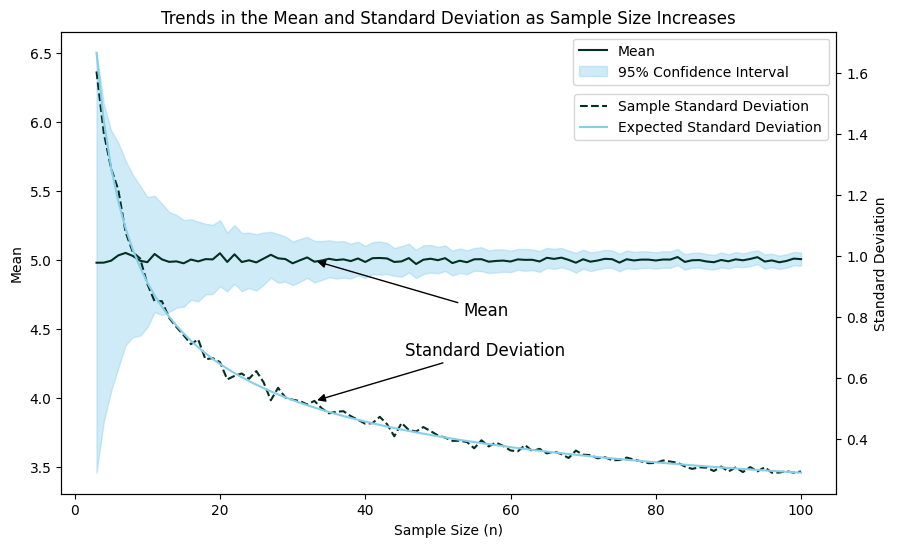

In [71]:
df_sample_stats = df_sample.groupby('n')['sample_mean'].agg(['mean', 'std']).reset_index()
df_sample_stats['root'] = population_standard_deviation/np.sqrt(df_sample_stats['n'])
df_sample_stats['lower_bound'] = df_sample_stats['mean']-1.645*df_sample_stats['std']/np.sqrt(df_sample_stats['n'])
df_sample_stats['upper_bound'] = df_sample_stats['mean']+1.645*df_sample_stats['std']/np.sqrt(df_sample_stats['n'])

# Create the figure and the first set of axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mean on the first y-axis
ax1.plot(df_sample_stats['n'], df_sample_stats['mean'], 'b-', color = '#023020', label='Mean')

# Plot shaded area for bounds on the first y-axis
ax1.fill_between(df_sample_stats['n'], df_sample_stats['lower_bound'], df_sample_stats['upper_bound'],
                  color='skyblue', alpha=0.4, label='95% Confidence Interval        ')

ax1.set_xlabel('Sample Size (n)')
ax1.set_ylabel('Mean', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set y-axis limits for the mean
# ax1.set_ylim(4, 6)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot standard deviation on the second y-axis
ax2.plot(df_sample_stats['n'], df_sample_stats['std'], 'r-', color = '#023020', linestyle = 'dashed', label='Sample Standard Deviation')
ax2.set_ylabel('Standard Deviation', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax2.plot(df_sample_stats['n'], df_sample_stats['root'], alpha=1,label='Expected Standard Deviation', color = 'skyblue')

# Add legends for both y-axes
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon=True)
ax2.legend(loc='upper right', bbox_to_anchor=(0.998, 0.88), frameon=True)

# Add title
# plt.title('Mean with Bounds and Standard Deviation')
plt.title('Trends in the Mean and Standard Deviation as Sample Size Increases')

# Add annotation for mean
mean_point = (df_sample_stats['n'][30], df_sample_stats['mean'][2])  # Example point to annotate
ax1.annotate(
    'Mean',
    xy=mean_point,
    xytext=(mean_point[0]+20.5, mean_point[1]-0.4),  # Offset for the text
    arrowprops=dict(facecolor='black', arrowstyle='-|>'),
    fontsize=12,
    color='black'
)


# Add annotation for mean
std_point = (df_sample_stats['n'][30], df_sample_stats['std'][28])  # Example point to annotate
ax2.annotate(
    'Standard Deviation',
    xy=std_point,
    xytext=(std_point[0]+12.5, std_point[1]+0.15),  # Offset for the text
    arrowprops=dict(facecolor='black', arrowstyle='-|>'),
    fontsize=12,
    color='black'
)


# Show the plot
plt.show()

For this part, it would be interesting to take the cases where N=100, and find the 95% confidence interval of where the true mean is. and then compare the TRUE mean with this and see if it's right 95% of the time

Instead of doing the above, maybe you can try rerunning this with different initial population distributions, like a skewed one or a slanted one, and create a plot with many plots in it that show how it still ends up being normal

You can also look at instead of taking a random sample from the population, take a sample of cases that is NOT random, and show that take a non random sample can bias the estimate of the population mean